### Chapter 7
### Fearture Engineering with the Housing Price Dataset
This notebook is a companion to the book XGBoost for Regression Predictive Modeling and Time Series Analysis. This chapter is a hands on guide for feature enineering designed to give you experience with exploratory data anslysis and different feature engineering techniques

### Citing some the sources I took some inspiration from 

- [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) - Kaggle kernel
- [kaggle Houysing price prediction](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/) - Kaggle kernel
- [Deploying Machine Learnin models](https://intel.udemy.com/organization/search/?src=ukw&q=Deploying+machine+learning+models) - Online Course

### Feature Engineering with the housing Price dataset

The house price data is available here -[housing_price_data](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

#### Citation for this dataset: `Dean De Cock(2011) Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project, Journal of Statistics Education, 19:3, DOI: 10.1080/10691898.2011.11889627. `

- importing dependencies 
- loading the data into `pandas`

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

pd.pandas.set_option("display.max_columns", None)

C:\Users\joyce\AppData\Local\Temp\ipykernel_22064\1765913776.py:5: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  import scipy.stats as stats


In [2]:
# load dataset
data = pd.read_csv("house_pricing.csv")
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# First & Foremost: `Separate dataset into train and test`

It is critical to separate our data intro training and testing set at the beginning. While engineering features some of the techniques learn the parameters from the data, its import to learn the parameters from the train set only, if we learn from the whole dataset then we are leaking informastion from the train dataset to the test

Some of the feature engineering techniques we will learn from the train set are below

- mean
- mode
- category frequency
- and category to number mappings


In [3]:
# Separating the dataset into train and test set, we will keep a randomseed so that we can reproduce the exact same train test set

# data.drop(["Id", "SalePrice"] --> Variables to predict the target
# data["SalePrice"]  ---> target
# test_size=0.1 --> percetange data allocate for Test
# random_state=0  --> randomseed for reproducing the train and test dataset

X_train, X_test, y_train, y_test = train_test_split(data.drop(["Id", "SalePrice"], axis=1), data["SalePrice"], test_size=0.1, random_state=0)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

# Performing feature Engineering

Some of the feature engineering techinques dicussed below will handle the following :

- Missing values
- Temporal variables
- putting variables in `similar scale`

## Handling `Missing values` for `categorical variables`

We will perform the following steps
- Replace missing variable with the string "missing" for those variables with a lot of missing data
- Replace missing values with the most frequent category for those variables with few missing observations


In [4]:
# identifying the catagorical variables 

vars_cat = [var for var in data.columns if data[var].dtype == "O"]

# We will add the variable MSSubClass to the list of catagorical variables. Please find the definition of 
# variable in the data_description.txt available in the kaggle website (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt)


# MSSubClass: Identifies the type of dwelling involved in the sale.	

#         20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	2-STORY 1946 & NEWER
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES


vars_cat = vars_cat + ["MSSubClass"]

# casting all categorical variables as object type
X_train[vars_cat] = X_train[vars_cat].astype("O")
X_test[vars_cat] = X_test[vars_cat].astype("O")

# number of categorical variables
len(vars_cat)

44

In [5]:
#categorical variables that contain missing values

cat_vars_with_na = [var for var in vars_cat if X_train[var].isnull().sum() > 0]

# percentage of missing for each of these variables
X_train[cat_vars_with_na ].isnull().mean().sort_values(ascending=False)

PoolQC          0.995434
MiscFeature     0.961187
Alley           0.938356
Fence           0.814307
FireplaceQu     0.472603
GarageType      0.056317
GarageFinish    0.056317
GarageQual      0.056317
GarageCond      0.056317
BsmtExposure    0.025114
BsmtFinType2    0.025114
BsmtQual        0.024353
BsmtCond        0.024353
BsmtFinType1    0.024353
MasVnrType      0.004566
Electrical      0.000761
dtype: float64

In [6]:
# variables with missing value to replace with string missing -- we are keeping 10 % as the threshold
for_missing_string = [var for var in cat_vars_with_na if X_train[var].isnull().mean() > 0.1]

In [7]:
print(for_missing_string)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
# replace missing values with 'missing' string

X_train[for_missing_string] = X_train[for_missing_string].fillna('Missing')
X_test[for_missing_string] = X_test[for_missing_string].fillna('Missing')

In [9]:
# variables with missing values to replace with the most frequent category  -- we are keeping 10 % as the threshold
for_frequent_category = [var for var in cat_vars_with_na if X_train[var].isnull().mean() < 0.1]

In [10]:
# replace missing values with the most frequent category

for var in for_frequent_category:
      
    # take the most common one, there can multiples of them, we take the first one
    mode = X_train[var].mode()[0]
    
    print(var, mode)
    
    X_train[var].fillna(mode, inplace=True)
    X_test[var].fillna(mode, inplace=True)

Alley Missing
MasVnrType None
BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Electrical SBrkr
FireplaceQu Missing
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA
PoolQC Missing
Fence Missing
MiscFeature Missing


In [11]:
# Lets check there is no missing or null values in these engineered features or variables in the train set

X_train[cat_vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [12]:
# Lets check there is no missing or null values in these engineered features or variables in the test set

X_test[cat_vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

## Handling `Missing values` for `numerical variables`

- first, creating a new binary indicator variable
- second, replacing missing values with the mean value in the original variables


In [13]:
# now let's identify the numerical variables

vars_num = [var for var in X_train.columns if var not in vars_cat and var != "SalePrice"]

# number of numerical variables
len(vars_num)

35

In [14]:
# the numerical variables that contain missing values
vars_num_na = [var for var in vars_num if X_train[var].isnull().sum() > 0]

# percentage of missing values per variable
X_train[vars_num_na ].isnull().mean()

LotFrontage    0.177321
MasVnrArea     0.004566
GarageYrBlt    0.056317
dtype: float64

In [15]:
# creating binary variables and replacing null value with mean as described above

for var in vars_num_na:

    # calculate the mean value for each varible from the train set
    mean_val = X_train[var].mean()

    # creating binary indicator variable for both  train and test set
    X_train[var + "_na"] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var + "_na"] = np.where(X_test[var].isnull(), 1, 0)

    # replace missing values in the train and test set with train mean value
    X_train[var].fillna(mean_val, inplace=True)
    X_test[var].fillna(mean_val, inplace=True)

In [16]:
# check if we have missing values any more in train set
X_train[vars_num_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [17]:
# check if we have missing values any more in test set
X_test[vars_num_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [18]:
# lets check the binary indicator variables

X_train[["LotFrontage_na", "MasVnrArea_na", "GarageYrBlt_na"]].head()

,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,0,0,0
656,0,0,0
45,0,0,0
1348,1,0,0
55,0,0,0


## Handling `numerical varibles with some transformations`

### Performing `Log transform`

We will perform log transformstion on the postive numerical variables for which the distribution is not normal( https://github.com/PacktPublishing/XGBoost-for-Regression-Predictive-Modeling-and-Time-Series-Analysis/blob/partha1/ch7/exploratory_data_analysis.ipynb)

This will tranform these variables to be more Gaussian-like distribution. Please refer the data description to learn more on these variables - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt

In [19]:
import matplotlib.pyplot as plt

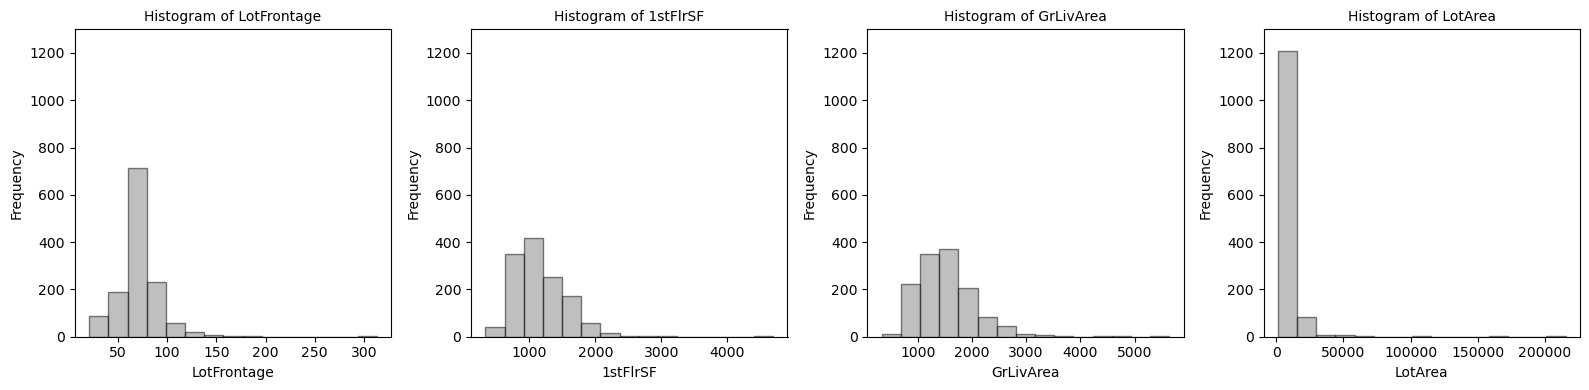

In [20]:
var_for_log_trans = ["LotFrontage", "1stFlrSF", "GrLivArea","LotArea"]
plotdf = X_train [var_for_log_trans]
fig, axes = plt.subplots(1,4, figsize=(16,4))
axes_flat = axes.flatten()

for i, (column, ax) in enumerate(zip(plotdf.columns, axes_flat)):
    plotdf[column].plot.hist(ax=ax, bins= 15, alpha = 0.5, color = "grey", edgecolor = "black")
    ax.set_title(f"Histogram of {column}", fontsize = 10)
    ax.set_xlabel(column, fontsize = 10)
    ax.set_ylim(0, 1300)

plt.tight_layout()
plt.show()

In [21]:
for var in var_for_log_trans:
    X_train["log_"+ var] = np.log(X_train[var])
    X_test["log_" + var] = np.log(X_test[var])

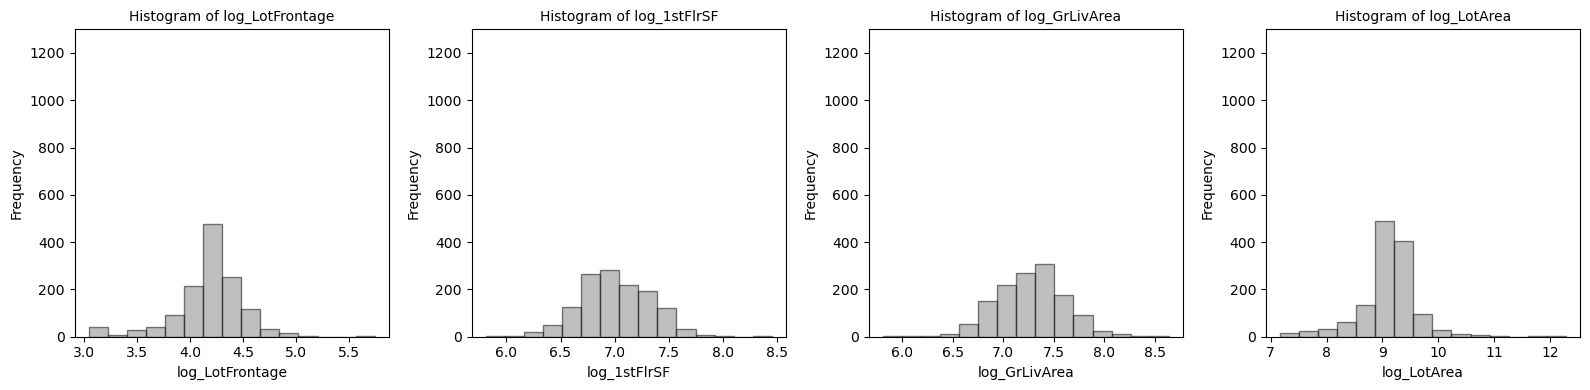

In [22]:
log_trans = ["log_LotFrontage", "log_1stFlrSF", "log_GrLivArea","log_LotArea"]
plotdf = X_train [log_trans]
fig, axes = plt.subplots(1,4, figsize=(16,4))
axes_flat = axes.flatten()

for i, (column, ax) in enumerate(zip(plotdf.columns, axes_flat)):
    plotdf[column].plot.hist(ax=ax, bins= 15, alpha = 0.5, color = "grey", edgecolor = "black")
    ax.set_title(f"Histogram of {column}", fontsize = 10)
    ax.set_xlabel(column, fontsize = 10)
    ax.set_ylim(0, 1300)

plt.tight_layout()
plt.show()

In [23]:
# check for missing values in these transformed variables in train set
X_train[log_trans].isnull().sum()

log_LotFrontage    0
log_1stFlrSF       0
log_GrLivArea      0
log_LotArea        0
dtype: int64

In [24]:
# check for missing values in these transformed variables in test set
X_test[log_trans].isnull().sum()

log_LotFrontage    0
log_1stFlrSF       0
log_GrLivArea      0
log_LotArea        0
dtype: int64

## Apply Log scale on Target


In [25]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

### Handling `skewed variables by transforming into binary variables`

As dicussed in the exploratory data analysis notebook, we will transform the skewed variables into binary variables.

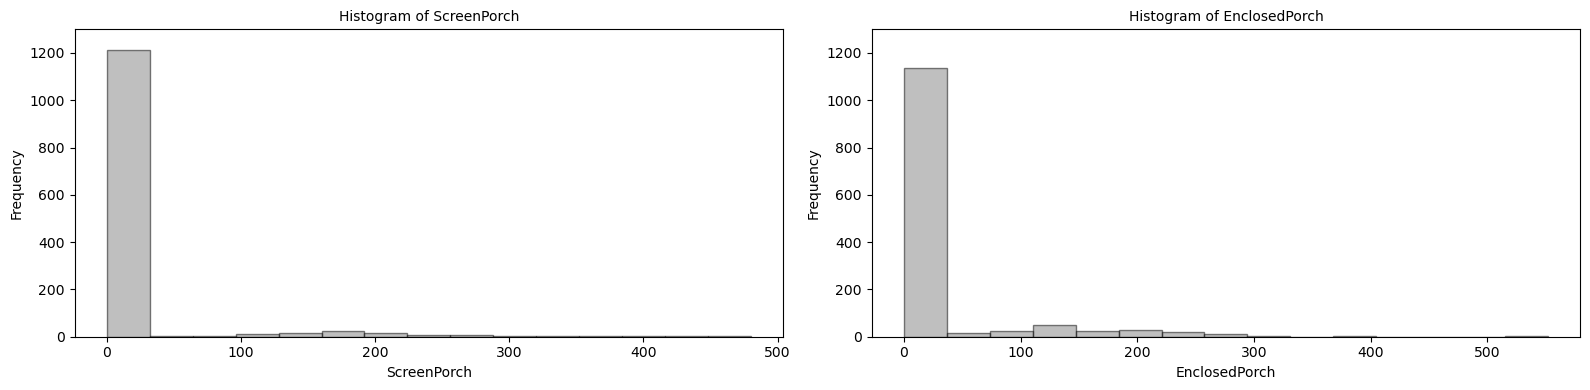

In [26]:
skewed_vars = ['ScreenPorch', 'EnclosedPorch']
plotdf = X_train [skewed_vars]
fig, axes = plt.subplots(1,2, figsize=(16,4))
axes_flat = axes.flatten()

for i, (column, ax) in enumerate(zip(plotdf.columns, axes_flat)):
    plotdf[column].plot.hist(ax=ax, bins= 15, alpha = 0.5, color = "grey", edgecolor = "black")
    ax.set_title(f"Histogram of {column}", fontsize = 10)
    ax.set_xlabel(column, fontsize = 10)
    ax.set_ylim(0, 1300)

plt.tight_layout()
plt.show()

In [27]:
for var in skewed_vars:
    # map the variable values into 0 and 1
    X_train["binary_"+ var] = np.where(X_train[var]==0, 0, 1)
    X_test["binary_"+ var] = np.where(X_test[var]==0, 0, 1)

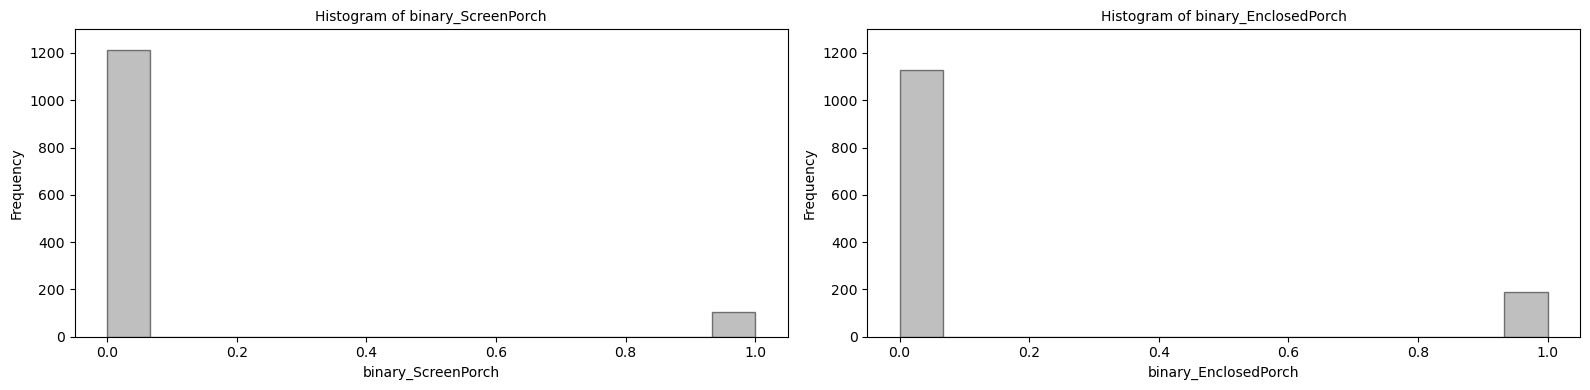

In [28]:
binary_trans = ["binary_ScreenPorch", "binary_EnclosedPorch"]
plotdf = X_train [binary_trans]
fig, axes = plt.subplots(1,2, figsize=(16,4))
axes_flat = axes.flatten()

for i, (column, ax) in enumerate(zip(plotdf.columns, axes_flat)):
    plotdf[column].plot.hist(ax=ax, bins= 15, alpha = 0.5, color = "grey", edgecolor = "black")
    ax.set_title(f"Histogram of {column}", fontsize = 10)
    ax.set_xlabel(column, fontsize = 10)
    ax.set_ylim(0, 1300)

plt.tight_layout()
plt.show()


## Scaling features

For most linear machine learning models (except decision tree based models) we need to scale features. Here we will perform min max scaling. 
Please read about Min max scaler here if you are not already familiar with it - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [29]:
# work with the numberic columns only
X_train_num = X_train[vars_num]
X_train_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
930,73.000000,8925,8,5,2007,2007,0.0,16,0,1450,1466,1466,0,0,1466,0,0,2,0,3,1,7,0,2007.0,3,610,100,18,0,0,0,0,0,7,2009
656,72.000000,10007,5,7,1959,2006,54.0,806,0,247,1053,1053,0,0,1053,1,0,1,1,3,1,5,0,1959.0,1,312,0,0,0,0,0,0,0,8,2008
45,61.000000,7658,9,5,2005,2005,412.0,456,0,1296,1752,1752,0,0,1752,1,0,2,0,2,1,6,1,2005.0,2,576,196,82,0,0,0,0,0,2,2010
1348,69.879741,16196,7,5,1998,1998,0.0,1443,0,39,1482,1494,0,0,1494,1,0,2,0,3,1,5,1,1998.0,2,514,402,25,0,0,0,0,0,8,2007
55,100.000000,10175,6,5,1964,1964,272.0,490,0,935,1425,1425,0,0,1425,0,0,2,0,3,1,7,1,1964.0,2,576,0,0,0,407,0,0,0,7,2008


In [30]:
X_test_num = X_test[vars_num]
X_test_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
529,69.879741,32668,6,3,1957,1975,103.797401,1219,0,816,2035,2515,0,0,2515,1,0,3,0,4,2,9,2,1975.0,2,484,0,0,200,0,0,0,0,3,2007
491,79.000000,9490,6,7,1941,1950,0.000000,403,165,238,806,958,620,0,1578,1,0,1,0,3,1,5,2,1941.0,1,240,0,0,32,0,0,0,0,8,2006
459,69.879741,7015,5,4,1950,1950,161.000000,185,0,524,709,979,224,0,1203,1,0,1,0,3,1,5,1,1950.0,1,352,0,0,248,0,0,0,0,7,2009
279,83.000000,10005,7,5,1977,1977,299.000000,392,0,768,1160,1156,866,0,2022,0,0,2,1,4,1,8,1,1977.0,2,505,288,117,0,0,0,0,0,3,2008
655,21.000000,1680,6,5,1971,1971,381.000000,0,0,525,525,525,567,0,1092,0,0,1,1,3,1,6,0,1971.0,1,264,0,0,0,0,0,0,0,3,2010


In [31]:

# set the scale from the sklearn library import at the beginning of this notebook
from sklearn.preprocessing import MinMaxScaler

set_scale = MinMaxScaler()


In [32]:
# fit it on the train dataset
scaler = set_scale.fit(X_train_num.values) 

In [33]:
# now with this fit, transform both train and test dataset
X_train_scale = pd.DataFrame(scaler.transform(X_train_num.values), columns=X_train_num.columns, index=X_train_num.index)

X_test_scale = pd.DataFrame(scaler.transform(X_test_num.values), columns=X_test_num.columns, index=X_test_num.index)

In [34]:
X_train_scale.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
930,0.178082,0.035640,0.777778,0.50,0.978261,0.950000,0.00000,0.002835,0.0,0.673479,0.239935,0.259752,0.0,0.0,0.213263,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.416667,0.000000,0.972727,0.75,0.430183,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.545455,0.75
656,0.174658,0.040697,0.444444,0.75,0.630435,0.933333,0.03375,0.142807,0.0,0.114724,0.172340,0.164984,0.0,0.0,0.135456,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.250000,0.000000,0.536364,0.25,0.220028,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.636364,0.50
45,0.136986,0.029718,0.888889,0.50,0.963768,0.916667,0.25750,0.080794,0.0,0.601951,0.286743,0.325379,0.0,0.0,0.267144,0.333333,0.0,0.666667,0.0,0.250,0.333333,0.333333,0.333333,0.954545,0.50,0.406206,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.090909,1.00
1348,0.167396,0.069625,0.666667,0.50,0.913043,0.800000,0.00000,0.255670,0.0,0.018114,0.242553,0.266177,0.0,0.0,0.218538,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.250000,0.333333,0.890909,0.50,0.362482,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.636364,0.25
55,0.270548,0.041483,0.555556,0.50,0.666667,0.233333,0.17000,0.086818,0.0,0.434278,0.233224,0.250344,0.0,0.0,0.205539,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.416667,0.333333,0.581818,0.50,0.406206,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.545455,0.50


## Handling `Temporal variables`

As dicussed in the previous data exploration notebook there are three temporal variables:
- GarageYrBlt: Year garage was built
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date 

For these variables, we will capture the difference in time between these variables and the year in which the house was sold

In [35]:
def years_diff(df, var):
    df["YrSold_-_" + var] = df["YrSold"] - df[var]
    return df

In [36]:
for var in ["YearBuilt", "YearRemodAdd", "GarageYrBlt"]:
    X_train_diff = years_diff(X_train, var)
    X_test_diff = years_diff(X_test, var)

In [37]:
print("Original table: ", X_train.loc[0,"YrSold"], X_train.loc[0,"YearBuilt"], X_train.loc[0,"YearRemodAdd"], X_train.loc[0,"GarageYrBlt"])
print("Date difference: ", X_train_diff.loc[0,"YrSold"], X_train_diff.loc[0,"YrSold_-_YearBuilt"], X_train_diff.loc[0,"YrSold_-_YearRemodAdd"], X_train_diff.loc[0,"YrSold_-_GarageYrBlt"])

Original table:  2008 2003 2003 2003.0
Date difference:  2008 5 5 5.0


In [38]:
# lets drop "YrSold" from both train and test set
X_train_diff.drop(["YrSold"], axis=1, inplace=True)
X_test_diff.drop(["YrSold"], axis=1, inplace=True)

In [39]:
X_train_diff.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,log_LotFrontage,log_1stFlrSF,log_GrLivArea,log_LotArea,binary_ScreenPorch,binary_EnclosedPorch,YrSold_-_YearBuilt,YrSold_-_YearRemodAdd,YrSold_-_GarageYrBlt
930,20,RL,73.000000,8925,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,16,Unf,0,1450,1466,GasA,Ex,Y,SBrkr,1466,0,0,1466,0,0,2,0,3,1,Gd,7,Typ,0,Missing,Attchd,2007.0,Fin,3,610,TA,TA,Y,100,18,0,0,0,0,Missing,Missing,Missing,0,7,WD,Normal,0,0,0,4.290459,7.290293,7.290293,9.096612,0,0,2,2,2.0
656,20,RL,72.000000,10007,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,2006,Gable,CompShg,HdBoard,HdBoard,BrkFace,54.0,Gd,TA,CBlock,TA,TA,No,ALQ,806,Unf,0,247,1053,GasA,Ex,Y,SBrkr,1053,0,0,1053,1,0,1,1,3,1,Gd,5,Typ,0,Missing,Attchd,1959.0,RFn,1,312,TA,TA,Y,0,0,0,0,0,0,Missing,MnPrv,Missing,0,8,WD,Normal,0,0,0,4.276666,6.959399,6.959399,9.211040,0,0,49,2,49.0
45,120,RL,61.000000,7658,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Ex,TA,PConc,Ex,TA,No,GLQ,456,Unf,0,1296,1752,GasA,Ex,Y,SBrkr,1752,0,0,1752,1,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2005.0,RFn,2,576,TA,TA,Y,196,82,0,0,0,0,Missing,Missing,Missing,0,2,WD,Normal,0,0,0,4.110874,7.468513,7.468513,8.943506,0,0,5,5,5.0
1348,20,RL,69.879741,16196,Pave,Missing,IR3,Low,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1443,Unf,0,39,1482,GasA,Ex,Y,SBrkr,1494,0,0,1494,1,0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,1998.0,RFn,2,514,TA,TA,Y,402,25,0,0,0,0,Missing,Missing,Missing,0,8,WD,Normal,1,0,0,4.246776,7.309212,7.309212,9.692520,0,0,9,9,9.0
55,20,RL,100.000000,10175,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1964,1964,Gable,CompShg,HdBoard,Plywood,BrkFace,272.0,TA,TA,CBlock,TA,TA,No,BLQ,490,Unf,0,935,1425,GasA,Gd,Y,SBrkr,1425,0,0,1425,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1964.0,RFn,2,576,TA,TA,Y,0,0,0,407,0,0,Missing,Missing,Missing,0,7,WD,Normal,0,0,0,4.605170,7.261927,7.261927,9.227689,0,0,44,44,44.0


## Transforming `Categorical variables`

We will apply order mappings according to order or related quality etc. Please refer data description here -https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt


In [40]:
# mappings string to numbers based on quality

map_quality = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5, "Missing": 0, "NA": 0}

vars_qual = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
             "HeatingQC", "KitchenQual", "FireplaceQu",
             "GarageQual", "GarageCond",
            ]

for var in vars_qual:
    X_train["map_"+ var] = X_train[var].map(map_quality)
    X_test["map_"+ var] = X_test[var].map(map_quality)

In [41]:
X_train[["ExterQual", "map_ExterQual","BsmtQual","map_BsmtQual","FireplaceQu","map_FireplaceQu"]].head()

,ExterQual,map_ExterQual,BsmtQual,map_BsmtQual,FireplaceQu,map_FireplaceQu
930,Gd,4,Gd,4,Missing,0
656,Gd,4,TA,3,Missing,0
45,Ex,5,Ex,5,Gd,4
1348,Gd,4,Gd,4,Fa,2
55,TA,3,TA,3,Gd,4


In [42]:
map_exposure = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var_expose = 'BsmtExposure'

X_train["map_"+ var_expose] = X_train[var_expose].map(map_exposure)
X_test["map_"+ var_expose] = X_test[var_expose].map(map_exposure)

In [43]:
map_finish = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

vars_finish = ['BsmtFinType1', 'BsmtFinType2']

for var in vars_finish:
    X_train["map_"+ var] = X_train[var].map(map_finish)
    X_test["map_"+ var] = X_test[var].map(map_finish)

In [44]:
map_garage = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var_garage = 'GarageFinish'

X_train["map_"+ var_garage] = X_train[var_garage].map(map_garage )
X_test["map_"+ var_garage] = X_test[var_garage].map(map_garage )

In [45]:
map_fence = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var_fence = 'Fence'

X_train["map_"+ var_fence] = X_train[var_fence].map(map_fence)
X_test["map_"+ var_fence] = X_test[var_fence].map(map_fence)

### Identify rarelabels for rest of the categorical variables`

All values of categorical variables that are shared by less than 1% of houses, well be replaced by the string "Rare".


In [46]:
# make a list of all catergorical 

vars_qual_all  = vars_qual + [var_expose] + vars_finish + [var_garage] + [var_fence]

#rest of the variales
cat_others = [ var for var in vars_cat if var not in vars_qual_all ]

len(cat_others)

30

In [47]:
# this function will find rare labels
def find_rare_labels(df, var, perc):
    
    df_copy = df.copy()
    
    # find the counts per catergorical value
    tmp_cat = df.groupby(var)[var].count() / len(df)

    # return categories that very rare
    return tmp_cat[tmp_cat < perc].index


In [48]:
for var in cat_others:
    
    # find the rare labels list
    rare_arr = find_rare_labels(X_train, var, 0.01)
    
    print(var, rare_arr)
    print()
    
    # replace rare categories by the string "Rare"
    X_train["rare_" + var] = np.where(X_train[var].isin(
        rare_arr), 'Rare', X_train[var])
    
    #remember to use the same for the test set
    X_test["rare_" + var] = np.where(X_test[var].isin(
        rare_arr), 'Rare', X_test[var])

MSZoning Index(['C (all)'], dtype='object', name='MSZoning')

Street Index(['Grvl'], dtype='object', name='Street')

Alley Index([], dtype='object', name='Alley')

LotShape Index(['IR3'], dtype='object', name='LotShape')

LandContour Index([], dtype='object', name='LandContour')

Utilities Index(['NoSeWa'], dtype='object', name='Utilities')

LotConfig Index(['FR3'], dtype='object', name='LotConfig')

LandSlope Index(['Sev'], dtype='object', name='LandSlope')

Neighborhood Index(['Blueste', 'NPkVill', 'Veenker'], dtype='object', name='Neighborhood')

Condition1 Index(['PosA', 'RRAe', 'RRNe', 'RRNn'], dtype='object', name='Condition1')

Condition2 Index(['Artery', 'Feedr', 'PosA', 'PosN', 'RRAe', 'RRNn'], dtype='object', name='Condition2')

BldgType Index([], dtype='object', name='BldgType')

HouseStyle Index(['1.5Unf', '2.5Fin', '2.5Unf'], dtype='object', name='HouseStyle')

RoofStyle Index(['Flat', 'Gambrel', 'Mansard', 'Shed'], dtype='object', name='RoofStyle')

RoofMatl Index(['ClyTi

In [65]:
rare_cat_others = [col for col in X_train if col.startswith("rare_")]
X_train[rare_cat_others].head()

,rare_MSZoning,rare_Street,rare_Alley,rare_LotShape,rare_LandContour,rare_Utilities,rare_LotConfig,rare_LandSlope,rare_Neighborhood,rare_Condition1,rare_Condition2,rare_BldgType,rare_HouseStyle,rare_RoofStyle,rare_RoofMatl,rare_Exterior1st,rare_Exterior2nd,rare_MasVnrType,rare_Foundation,rare_Heating,rare_CentralAir,rare_Electrical,rare_Functional,rare_GarageType,rare_PavedDrive,rare_PoolQC,rare_MiscFeature,rare_SaleType,rare_SaleCondition,rare_MSSubClass
930,RL,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,Missing,Missing,WD,Normal,20
656,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,Missing,Missing,WD,Normal,20
45,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,Missing,Missing,WD,Normal,120
1348,RL,Pave,Missing,Rare,Low,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,Missing,Missing,WD,Normal,20
55,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,Missing,Missing,WD,Normal,20


### Encoding Categorical variables

Here, we will transform the strings values in to numbers. Here, we will keep it simple, we will capture the relationship between the label and the target

In Chapter 8, we will have a comprehensive learning and handson eeperince with various categorical encoding techniques


In [66]:
# function to assign integers to catergories order by mean salePrice low to high

def impute_category(X_train, X_test, y_train, var, target):
    
    df_tmp = pd.concat([X_train, y_train], axis=1)
    
    #create the list of catgorical values for a variable sorted by the mean Sale Price less to high
    category_order = df_tmp.groupby([var])[target].mean().sort_values().index
    
    # create mapping for each category value to an integer in increasing order
    ordered_num_labels = {k: i for i, k in enumerate(category_order)}
    
    #e.g.: {k: i for i, k in enumerate(['a','b','c','d'])}
    # {'a': 0, 'b': 1, 'c': 2, 'd': 3}
    
    print(var, ordered_num_labels)
    print()

    # use the mapping asbe to replace categories
    X_train["encode_"+ var] = X_train[var].map(ordered_num_labels)
    X_test["encode_" + var] = X_test[var].map(ordered_num_labels)

In [67]:
for var in cat_others:
    impute_category(X_train, X_test, y_train, var, 'SalePrice')

MSZoning {'C (all)': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street {'Grvl': 0, 'Pave': 1}

Alley {'Grvl': 0, 'Pave': 1, 'Missing': 2}

LotShape {'Reg': 0, 'IR1': 1, 'IR3': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'NoSeWa': 0, 'AllPub': 1}

LotConfig {'FR2': 0, 'Inside': 1, 'Corner': 2, 'FR3': 3, 'CulDSac': 4}

LandSlope {'Gtl': 0, 'Mod': 1, 'Sev': 2}

Neighborhood {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'Blueste': 7, 'NPkVill': 8, 'SWISU': 9, 'NAmes': 10, 'Mitchel': 11, 'SawyerW': 12, 'NWAmes': 13, 'Gilbert': 14, 'Blmngtn': 15, 'CollgCr': 16, 'ClearCr': 17, 'Crawfor': 18, 'Somerst': 19, 'Veenker': 20, 'Timber': 21, 'StoneBr': 22, 'NridgHt': 23, 'NoRidge': 24}

Condition1 {'Artery': 0, 'RRAe': 1, 'Feedr': 2, 'RRAn': 3, 'Norm': 4, 'RRNe': 5, 'PosN': 6, 'PosA': 7, 'RRNn': 8}

Condition2 {'RRNn': 0, 'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRAe': 4, 'PosN': 5, 'PosA': 6}

BldgType {'2fmCon': 0, 'Dupl

In [68]:
# check for null values in train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [69]:
# check for null values in test  set
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

['encode_Condition2']

In [96]:
df_tmp = pd.concat([X_train.filter(regex='^encode_'), np.log(y_train)], axis=1)
df_tmp.head()

,encode_MSZoning,encode_Street,encode_Alley,encode_LotShape,encode_LandContour,encode_Utilities,encode_LotConfig,encode_LandSlope,encode_Neighborhood,encode_Condition1,encode_Condition2,encode_BldgType,encode_HouseStyle,encode_RoofStyle,encode_RoofMatl,encode_Exterior1st,encode_Exterior2nd,encode_MasVnrType,encode_Foundation,encode_Heating,encode_CentralAir,encode_Electrical,encode_Functional,encode_GarageType,encode_PavedDrive,encode_PoolQC,encode_MiscFeature,encode_SaleType,encode_SaleCondition,encode_MSSubClass,SalePrice
930,3,1,2,1,3,1,1,0,21,4,3,4,5,1,2,11,13,1,5,5,1,4,6,4,2,0,3,4,4,11,12.211060
656,3,1,2,1,1,1,1,0,10,4,3,4,5,1,2,7,9,2,2,5,1,4,6,4,2,0,3,4,4,11,11.887931
45,3,1,2,0,1,1,1,0,23,4,3,3,5,4,2,5,6,2,5,5,1,4,6,4,2,0,3,4,4,13,12.675764
1348,3,1,2,2,2,1,1,0,12,4,3,4,5,1,2,11,13,1,5,5,1,4,6,4,2,0,3,4,4,11,12.278393
55,3,1,2,1,1,1,1,0,10,4,3,4,5,1,2,7,10,2,2,5,1,4,6,4,2,0,3,4,4,11,12.103486


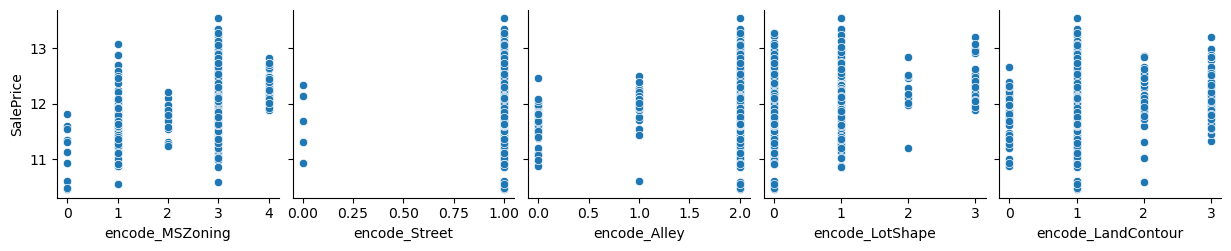

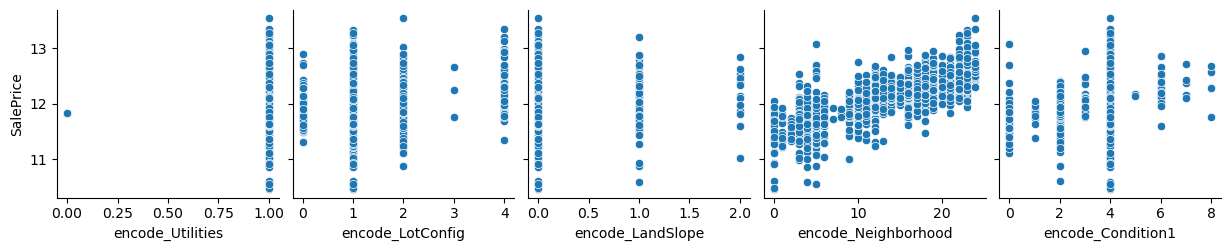

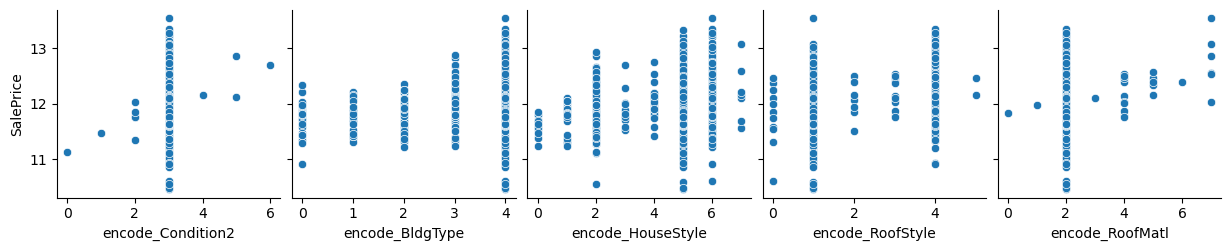

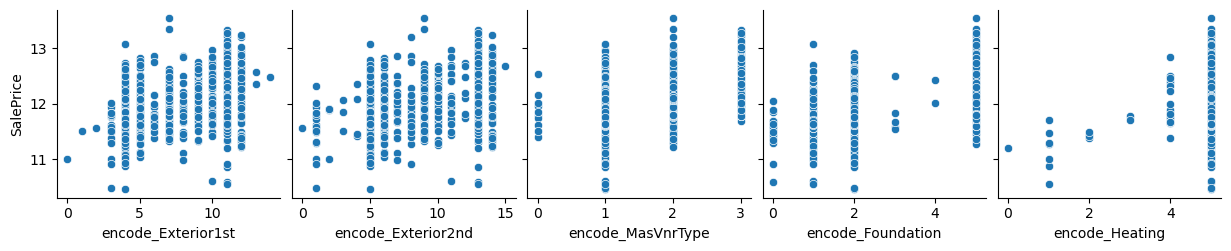

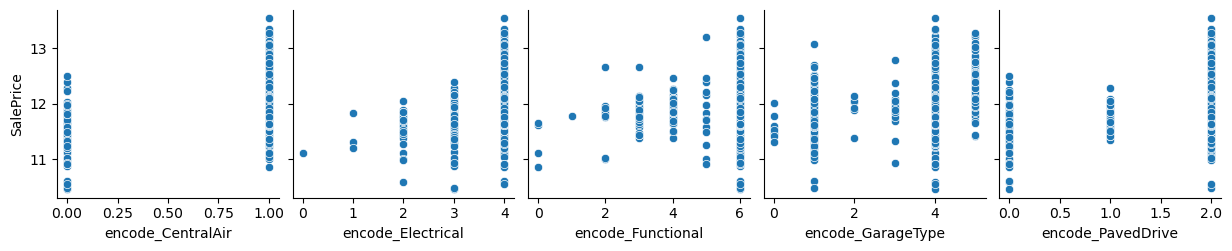

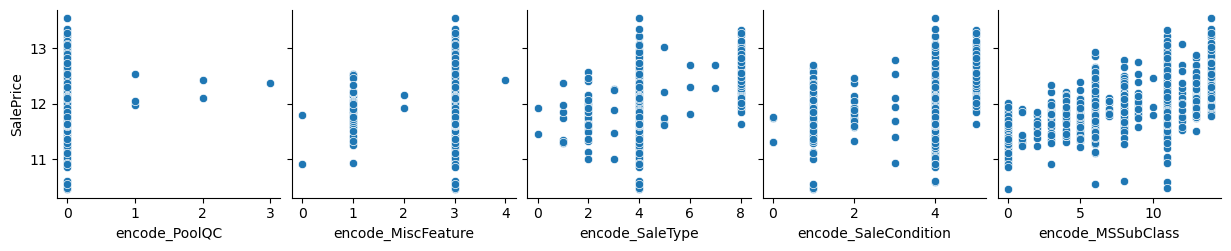

In [106]:
#there are 30 variables in the list that have been encoded
import seaborn as sns

for i in range (0, len(cat_others),5):
    g = sns.pairplot(df_tmp, y_vars=["SalePrice"], x_vars=["encode_"+ cat_others[i],"encode_"+ cat_others[i+1],"encode_"+ cat_others[i+2],"encode_"+ cat_others[i+3],"encode_"+ cat_others[i+4]])


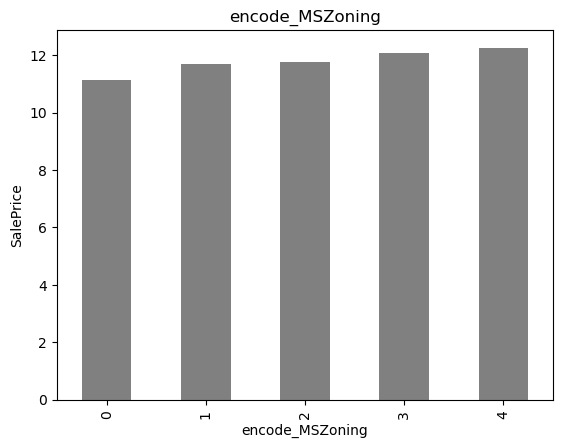

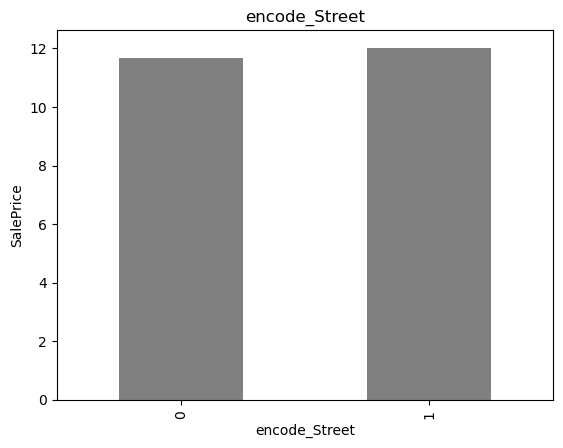

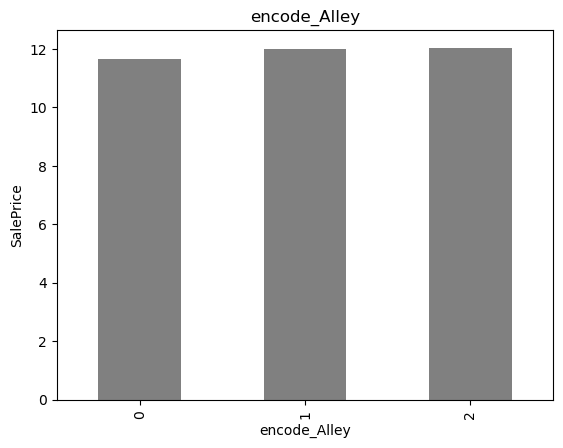

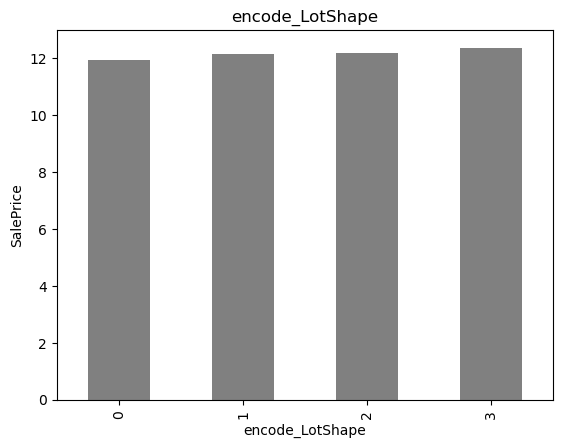

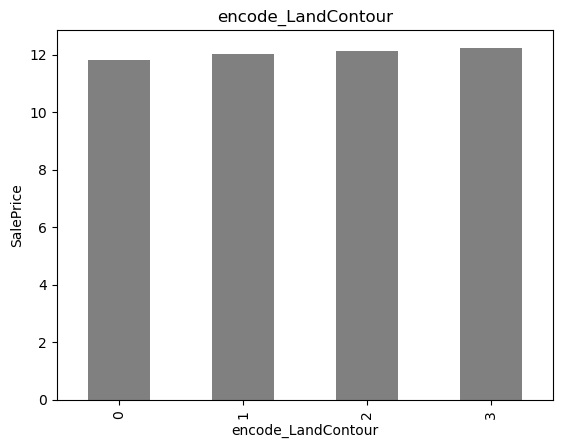

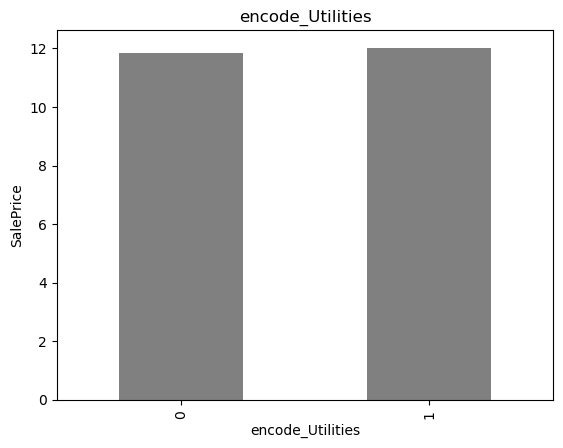

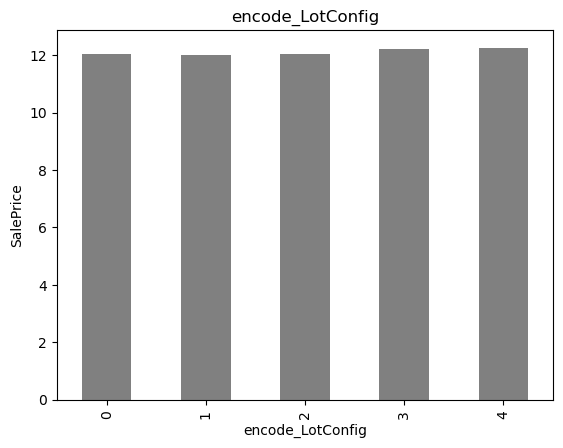

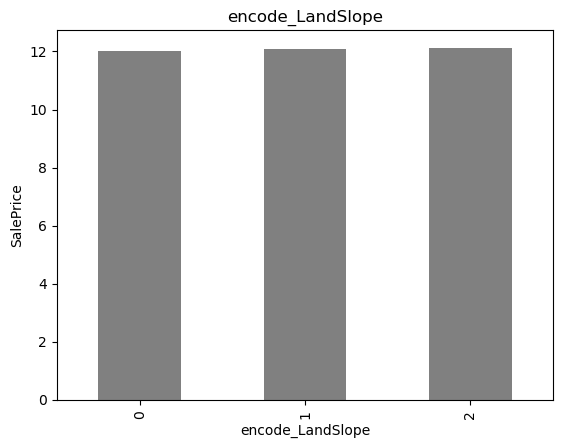

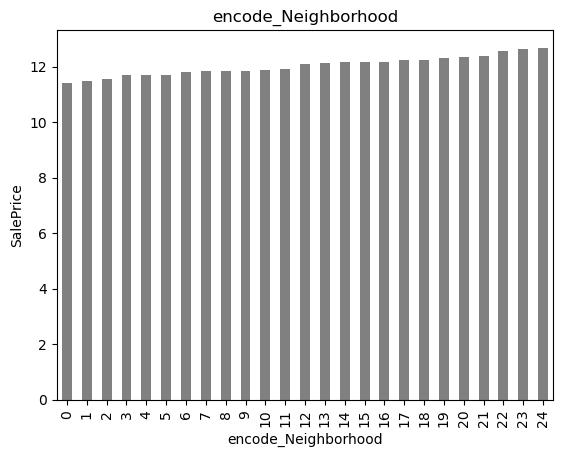

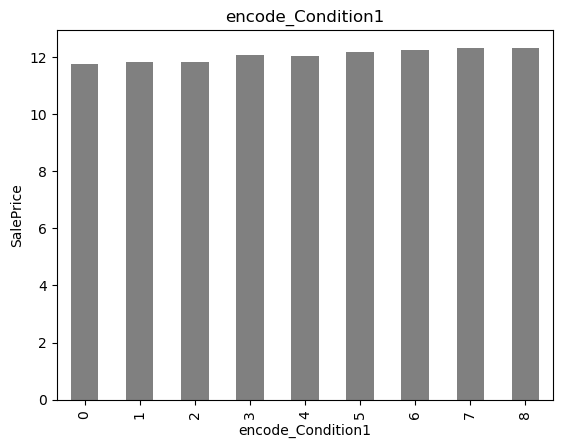

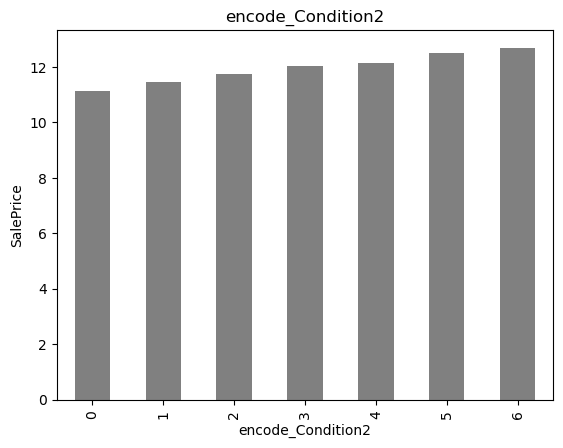

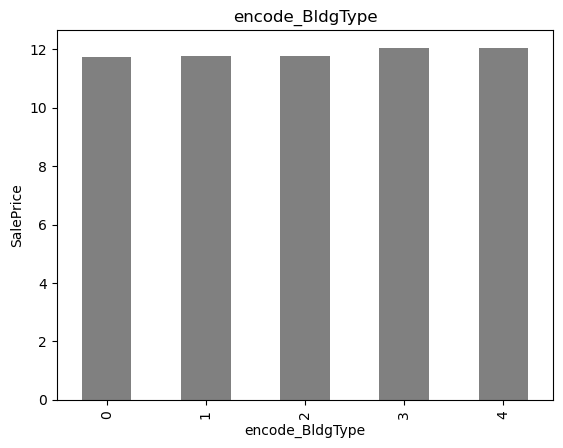

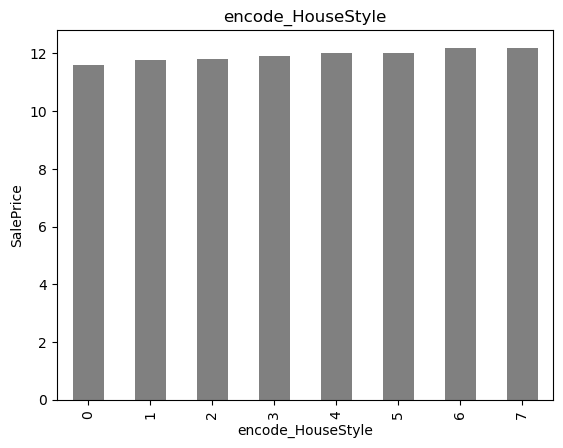

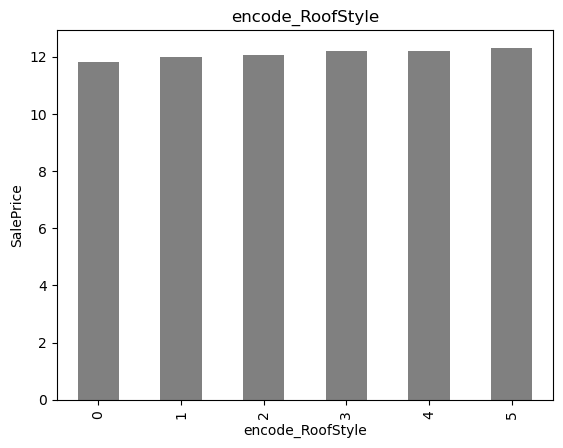

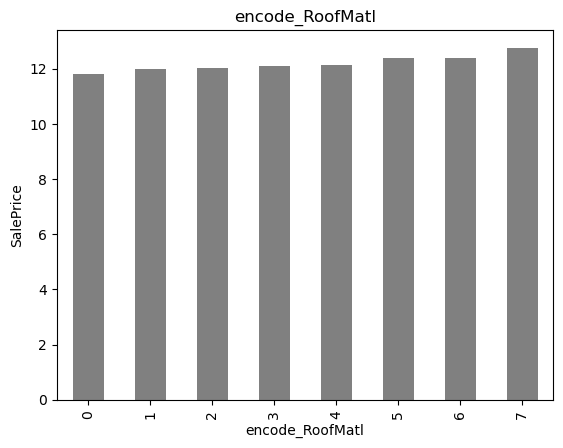

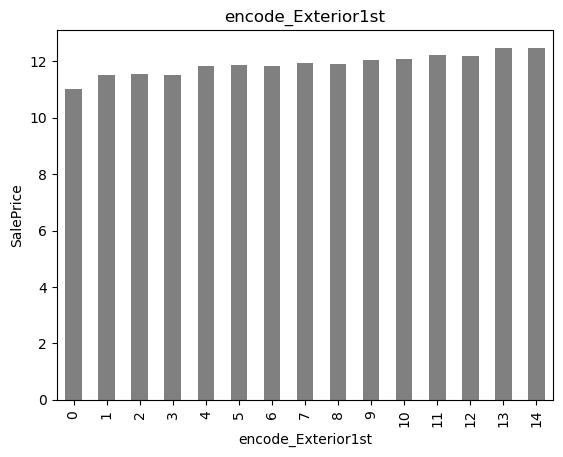

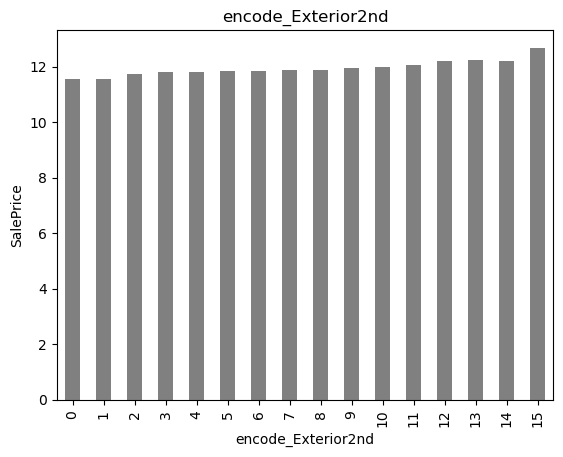

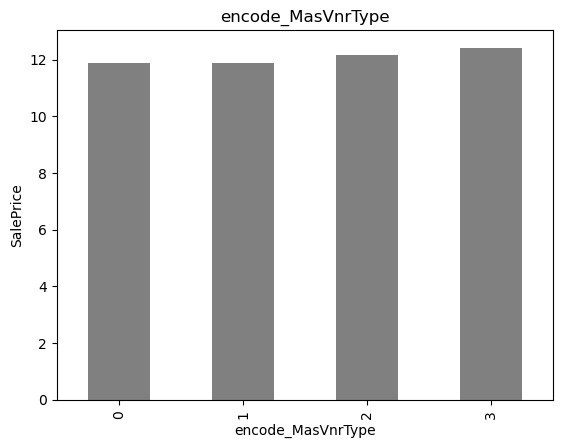

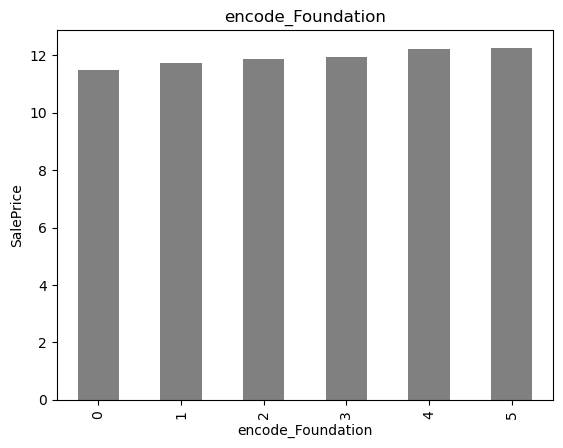

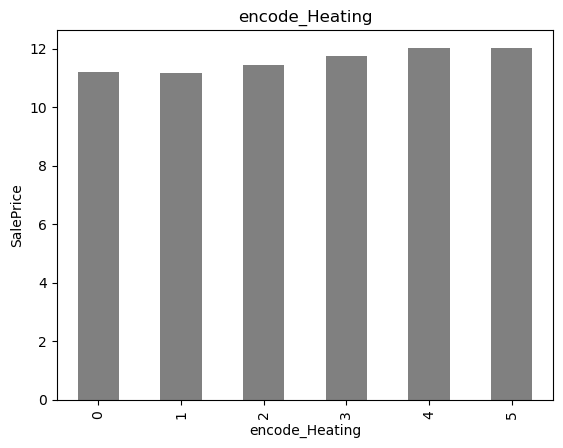

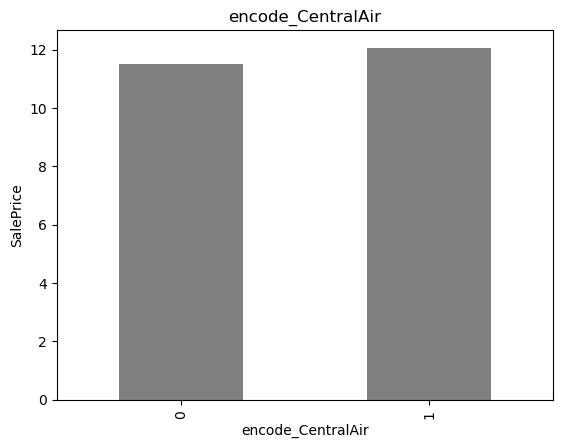

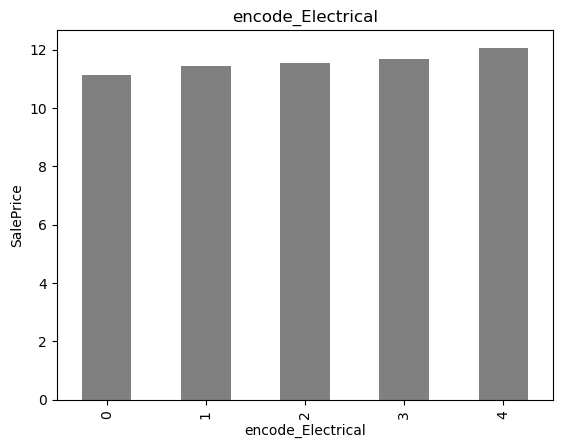

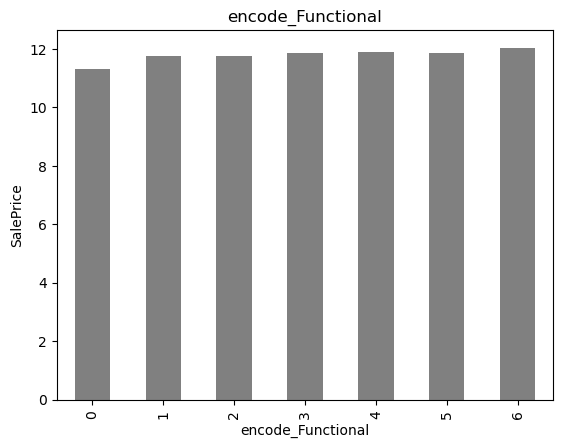

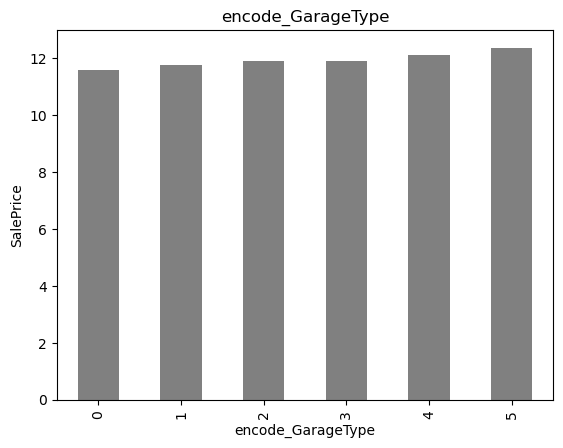

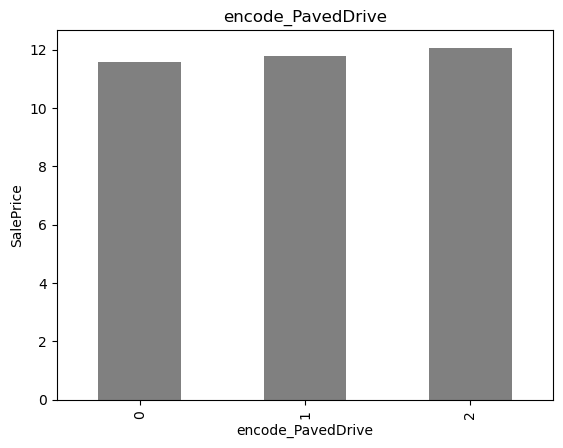

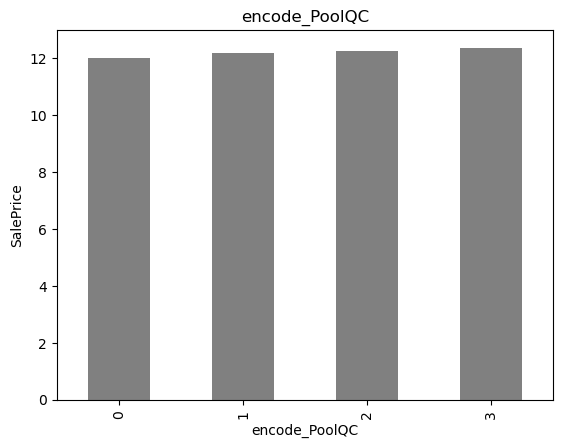

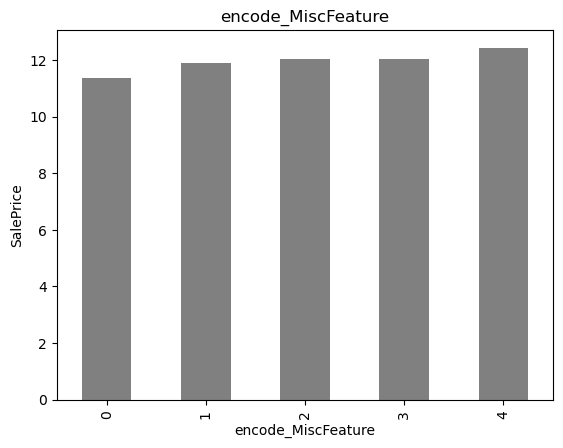

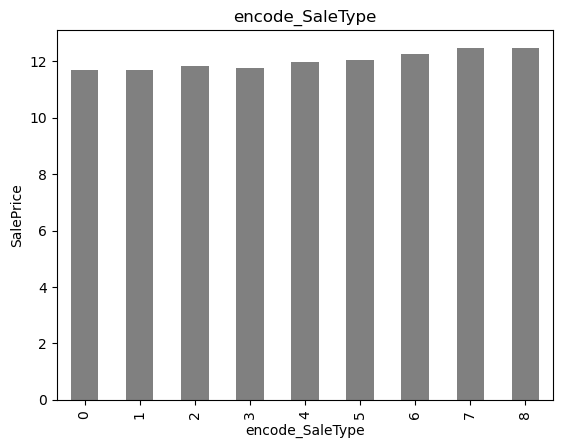

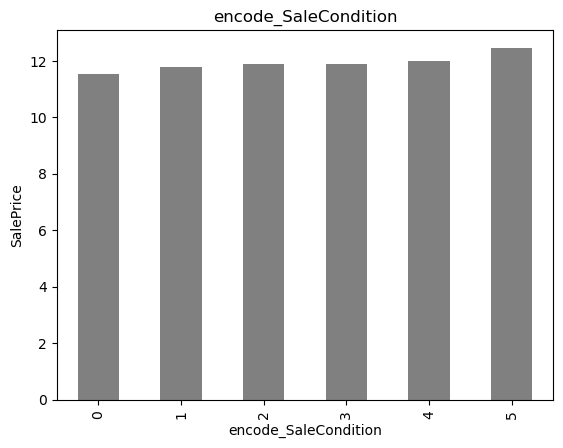

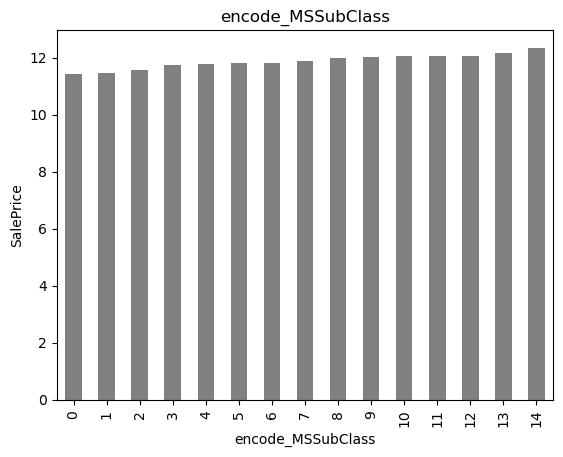

In [78]:
# Lets analyse relationship betwwen these variables and the target

def plot_cat_vars(X_train, y_train, var):
    
    #this function will plot mean sale price for each category of the variable
    
    df_tmp = pd.concat([X_train, np.log(y_train)], axis=1)
    
    df_tmp.groupby("encode_"+ var)["SalePrice"].mean().plot.bar(color = "grey")
    plt.title("encode_" + var)
    plt.ylabel("SalePrice")
    plt.show()
    
for var in cat_others:
     plot_cat_vars(X_train, y_train, var)

In [ ]:
for var in cat_others[:3]:
     plot_cat_vars(X_train, y_train, var)



Here, we can a see monotonic relationship between the variable and the target mean price, higher integer represents higher sale price and lower integer represents lower sale Price

Thank you for getting to the end of this notebook. Hopefully this notebook has given a very hands on experince with different feature engineering techniques on different 
types of attributes